In [1]:
# KaggleX Cohert 4 Skill Assessment Challenge

## Import Library and Download Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

2024-06-14 19:17:15.118346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 19:17:15.118435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 19:17:15.239612: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Dataset paths
train_path = "/kaggle/input/kagglex-car-price-prediction-dataset/train.csv"
test_path = "/kaggle/input/kagglex-car-price-prediction-dataset/test.csv"

df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## Check data

In [4]:
df.shape

(54273, 13)

In [5]:
test_df.shape

(36183, 12)

In [6]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [8]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [11]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [12]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


### Based on the data
- #### Too many models and engine
- #### Engine could probably be broken down into more features

## Exploratory Data Analysis (EDA) and Data Preprocessing

In [13]:
categorical_features = [
    "brand",
    "model",
    "fuel_type",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title",
]

numerical_features = [
    "milage",
    "model_year",
]

print(f"Number of Columns: {len(df.columns)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Columns: 13
Number of Categorical Features: 9
Number of Numerical Features: 2


### The 2 columns not used as features are:
- #### id
- #### price, which will be the label

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


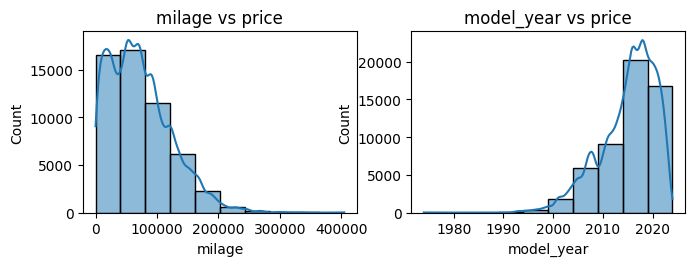

In [14]:
plt.figure(figsize=(12, 8))
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, index)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(f"{feature} vs price")
plt.show()

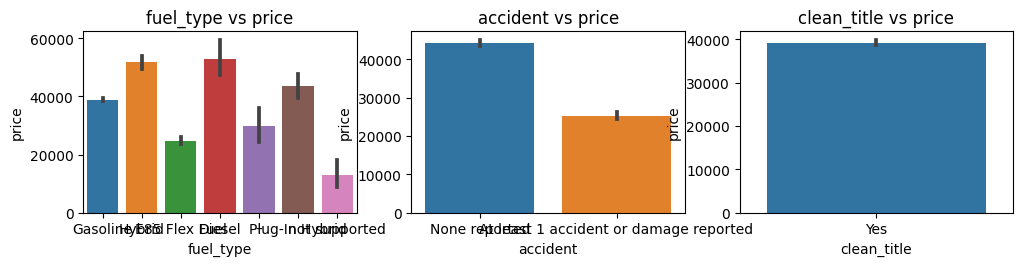

In [15]:
categorical_few_uniques_features = ["fuel_type", "accident", "clean_title"]

plt.figure(figsize=(12, 8))
for index, feature in enumerate(categorical_few_uniques_features, start=1):
    plt.subplot(3, 3, index)
    sns.barplot(data=df, x=feature, y="price")
    plt.title(f"{feature} vs price")
plt.show()

In [16]:
# Plot top 20 of 
#     "model",
#     "engine",
#     "transmission",
#     "ext_col",
#     "int_col",


In [17]:
# Plot price

In [18]:
# Plot heatmap

## Separate Features and Labels

In [19]:
# Set features similar to the test set only without id column
features = df.copy()
features.pop("id")

# Remove price column in features and save it in labels
labels = features.pop("price")
features.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes


In [20]:
labels.head()

0    11000
1     8250
2    15000
3    63500
4     7850
Name: price, dtype: int64

## Split Dataset

In [21]:
# Split the dataset into train (70%) and remain (30%) subsets
train_features, remain_features, train_labels, remain_labels = sklearn.model_selection.train_test_split(
    features, 
    labels,
    test_size=0.3,
    shuffle=True
)

# Split the remain subset into valid (70%) and test (30%) subset
valid_features, test_features, valid_labels, test_labels = sklearn.model_selection.train_test_split(
    remain_features, 
    remain_labels,
    test_size=0.3,
    shuffle=True
)

In [22]:
# Check if indices of features and labels still match
print(train_features.head().index)
print(train_labels.head().index)

print(test_features.head().index)
print(test_labels.head().index)

print(valid_features.head().index)
print(valid_labels.head().index)

Index([5461, 1650, 21844, 24212, 38010], dtype='int64')
Index([5461, 1650, 21844, 24212, 38010], dtype='int64')
Index([53171, 43081, 35889, 17997, 3901], dtype='int64')
Index([53171, 43081, 35889, 17997, 3901], dtype='int64')
Index([24022, 30450, 32115, 29791, 31805], dtype='int64')
Index([24022, 30450, 32115, 29791, 31805], dtype='int64')


In [23]:
# Check if dataset were split correctly
dataset_size = len(df)
print(dataset_size * 0.7, len(train_features), len(train_labels))
print(dataset_size * 0.3 * 0.7, len(valid_features), len(valid_labels))
print(dataset_size * 0.3 * 0.3, len(test_features), len(test_labels))

# Check if total of the subsets the same as dataset_size
dataset_size, len(train_features) + len(valid_features) + len(test_features), len(train_labels) + len(valid_labels) + len(test_labels)

37991.1 37991 37991
11397.33 11397 11397
4884.57 4885 4885


(54273, 54273, 54273)

## Build the model

In [24]:
model = tf.keras.Sequential(
    [
        # Input Layer, Normalized Layer Here 
        tf.keras.layers.Dense(units=128, activation="relu", name="Hidden Layer"),
        tf.keras.layers.Dense(units=1, activation="softmax", name="Output Layer"),
    ]
)



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

## Train Model

In [25]:
# View an example of input
train_features

# Model fit

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
5461,BMW,X1 sDrive28i,2017,43000,Gasoline,228.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,White,None reported,Yes
1650,Ford,Mustang V6,2014,118500,Gasoline,305.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes
21844,Hyundai,Sonata Sport 2.0T,2016,70500,Gasoline,245.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes
24212,Audi,e-tron Prestige,2019,16000,Gasoline,355.0HP Electric Motor Electric Fuel System,A/T,White,White,None reported,Yes
38010,Lexus,RX 350 Base,2013,110000,Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...
12500,Nissan,Altima 2.5 S,2014,87066,Gasoline,182.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,None reported,Yes
11111,Alfa,Romeo Giulia Base,2021,21400,Gasoline,280.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
6578,Audi,A4 2.0T Premium,2014,125575,Gasoline,211.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes
39400,Lexus,LC 500 Base,2021,22400,Gasoline,471.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Red,–,None reported,Yes


## Predict

TODO
- build model
- separate engine into different parameters
- remove id on train
- train model
- early stop
- graph result
- group lines

In [26]:
# train_subset.shape

In [27]:
# valid_subset.shape

In [28]:
# test_subset.shape